## Тествое задание от HiPP Rus

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# import ml_metrics as metrics

pd.options.mode.chained_assignment = None
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import ValueWarning

warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", ValueWarning)
warnings.simplefilter("ignore", RuntimeWarning)


%load_ext lab_black

In [2]:
df_sales = pd.read_excel("/home/sk27/work/test/HiPP/2014.06.25_Volga_sales.xlsx")

In [3]:
df_sales.head()

,Region,IMPORTER PRODUCT NAME,SAP BRAND-ENG,SKU CODE,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,...,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12
0,Volga,Активэкс S-607 мыло жид Актив 300 мл,ACTIVEX,343004,NaN,NaN,NaN,1020.0,2160.0,276.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Volga,Активэкс S-607 мыло жид Сенситив 300 мл,ACTIVEX,343005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Volga,Активэкс S-626 мыло антибактериал Актив экопак 4*70 г,ACTIVEX,122010,480.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Volga,Активэкс S-626 мыло антибактериал Сенситив экопак 4*70 г,ACTIVEX,122011,19104.0,3360.0,4128.0,2784.0,4512.0,4608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Volga,Activex/Активекс туалетное антибактериальное мыло 90г. Active Protection/Активная защита,ACTIVEX,122004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df_sales.info()

In [5]:
# df_sales.columns

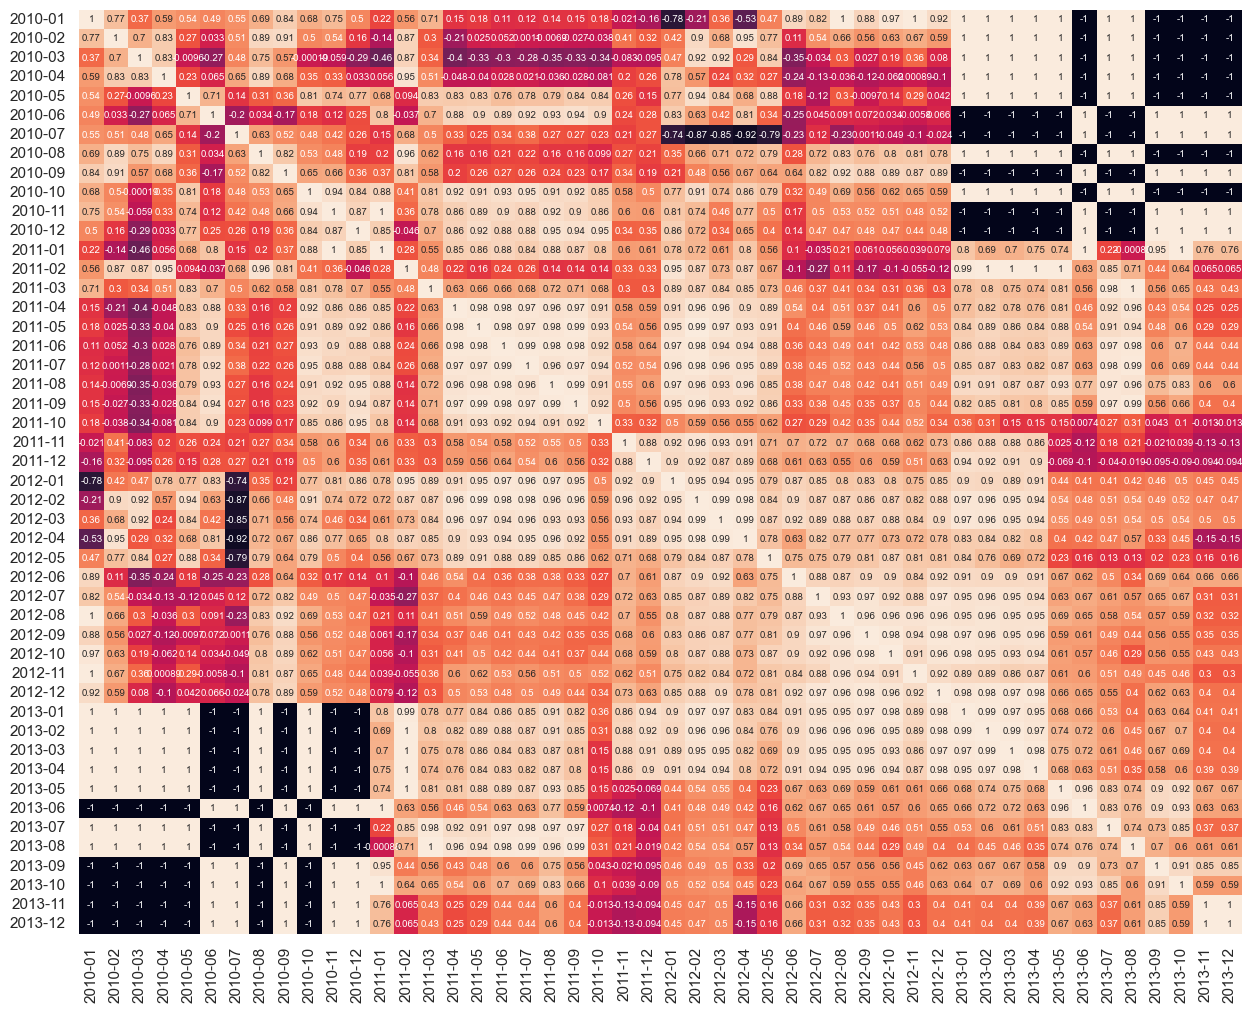

In [6]:
# корреляционная матрица
cols = [
    "2010-01",
    "2010-02",
    "2010-03",
    "2010-04",
    "2010-05",
    "2010-06",
    "2010-07",
    "2010-08",
    "2010-09",
    "2010-10",
    "2010-11",
    "2010-12",
    "2011-01",
    "2011-02",
    "2011-03",
    "2011-04",
    "2011-05",
    "2011-06",
    "2011-07",
    "2011-08",
    "2011-09",
    "2011-10",
    "2011-11",
    "2011-12",
    "2012-01",
    "2012-02",
    "2012-03",
    "2012-04",
    "2012-05",
    "2012-06",
    "2012-07",
    "2012-08",
    "2012-09",
    "2012-10",
    "2012-11",
    "2012-12",
    "2013-01",
    "2013-02",
    "2013-03",
    "2013-04",
    "2013-05",
    "2013-06",
    "2013-07",
    "2013-08",
    "2013-09",
    "2013-10",
    "2013-11",
    "2013-12",
]
sns.set(rc={"figure.figsize": (15, 12)})
hm = sns.heatmap(
    df_sales[cols].corr(), cbar=False, annot=True, annot_kws={"fontsize": 7}
)

# Ладно, блядь! Тогда вот вам анализ временных рядов.
## "А может и не помним, но будем вспоминать..."

In [7]:
df_sales = df_sales.groupby("SKU CODE").sum()

In [8]:
df_result = pd.DataFrame()
sku_code_list = list(df_sales.index)
for sku_code in sku_code_list:
    # выбираем данные по одному артикулу для анализа временного ряда
    df_test = pd.DataFrame(df_sales.loc[sku_code])
    df_test.index = pd.to_datetime(df_test.index, format="%Y-%m")
    df_predict = pd.DataFrame()
    for _ in range(0, 12):
        df_test_mouth = pd.DataFrame(df_test.iloc[[_, _ + 12, _ + 24, _ + 36]])
        model = ExponentialSmoothing(df_test_mouth)
        model_fit = model.fit()
        yhat = model_fit.predict(len(df_test_mouth), len(df_test_mouth))
        df_yhat = pd.DataFrame(yhat).rename(columns={0: sku_code})
        df_predict = pd.concat([df_predict, df_yhat])
    df_result = pd.concat([df_result, df_predict])
df_result = df_result.reset_index().rename(columns={"index": "date"})

In [9]:
df_result = (
    df_result.groupby("date")
    .sum()
    .T.reset_index()
    .rename(columns={"index": "sku_code"})
    .round()
)

In [10]:
df_result

date,sku_code,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00
0,110826,24128.0,34160.0,27600.0,29975.0,29600.0,30513.0,47041.0,29226.0,28866.0,32085.0,30452.0,39010.0
1,110848,4456.0,7225.0,3810.0,4301.0,1457.0,8982.0,10479.0,8483.0,7278.0,6206.0,8224.0,9383.0
2,110854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,113626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,502607,0.0,0.0,0.0,0.0,0.0,0.0,2664.0,4873.0,768.0,0.0,2136.0,2136.0
41,502895,480.0,540.0,660.0,690.0,720.0,1020.0,3870.0,2760.0,810.0,240.0,1110.0,1110.0
42,502931,288.0,506.0,882.0,1212.0,1050.0,648.0,6562.0,3600.0,3068.0,3066.0,2784.0,1703.0
43,502932,426.0,612.0,684.0,906.0,984.0,798.0,1742.0,2924.0,1636.0,897.0,1318.0,1789.0


In [11]:
# df_result.to_csv("/home/sk27/work/test/HiPP/analists.csv", sep=";")

***

In [13]:
pip install nona

ERROR:root:Cannot parse: 1:4: pip install nona
Traceback (most recent call last):
  File "/home/sk27/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/sk27/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1067, in format_str
  File "src/black/__init__.py", line 1077, in _format_str_once
  File "src/black/parsing.py", line 126, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 1:4: pip install nona


Note: you may need to restart the kernel to use updated packages.


In [14]:
# Загружаем библиотеку
from nona.nona import nona

# Подготовьте ваш датасет, только численные значения в датасете

# Заполняем пропущенные значения
# nona()

In [15]:
nona(df_result)

100%|██████████| 13/13 [00:00<00:00, 3130.26it/s]


In [16]:
df_result

date,sku_code,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00
0,110826,24128.0,34160.0,27600.0,29975.0,29600.0,30513.0,47041.0,29226.0,28866.0,32085.0,30452.0,39010.0
1,110848,4456.0,7225.0,3810.0,4301.0,1457.0,8982.0,10479.0,8483.0,7278.0,6206.0,8224.0,9383.0
2,110854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,113626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,502607,0.0,0.0,0.0,0.0,0.0,0.0,2664.0,4873.0,768.0,0.0,2136.0,2136.0
41,502895,480.0,540.0,660.0,690.0,720.0,1020.0,3870.0,2760.0,810.0,240.0,1110.0,1110.0
42,502931,288.0,506.0,882.0,1212.0,1050.0,648.0,6562.0,3600.0,3068.0,3066.0,2784.0,1703.0
43,502932,426.0,612.0,684.0,906.0,984.0,798.0,1742.0,2924.0,1636.0,897.0,1318.0,1789.0
